In [1]:
from datetime import datetime as dt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
all_free_tree = pd.read_csv('all_free_tree.csv', delimiter = ' ',
names = ['day','my_date','user_id','free_trees'],
                             usecols =['my_date','free_trees'],parse_dates=[0])



In [4]:
free_trees = all_free_tree.groupby('my_date').count()[['free_trees']]

<AxesSubplot:xlabel='my_date'>

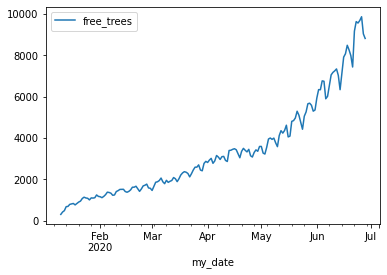

In [5]:
free_trees.plot()

In [6]:
free_trees_moving_avg= free_trees.rolling(window=10).mean()

<AxesSubplot:xlabel='my_date'>

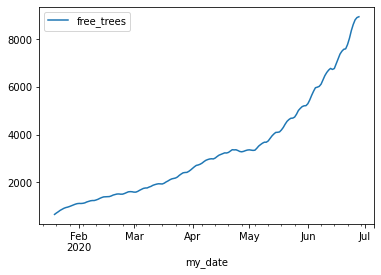

In [7]:
free_trees_moving_avg.plot()

In [8]:
free_trees.describe()

,free_trees
count,171.000000
mean,3372.871345
std,2303.881131
min,298.000000
25%,1535.500000
50%,2889.000000
75%,4392.500000
max,9870.000000


In [9]:
dates = free_trees.index.to_julian_date()

In [10]:
y = np.asarray(free_trees['free_trees']).reshape(-1,1)
x = np.asarray(dates).reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [12]:
y_pred= reg.predict(x_test)

In [13]:
reg.coef_

array([[44.04753546]])

In [14]:
reg.intercept_

array([-1.08307021e+08])

In [15]:
r2_score(y_test, y_pred)

0.8738722518416168

In [16]:
rest_year=pd.date_range(start="2020-06-29",end="2020-12-31")

In [17]:
needed_dates= rest_year.to_julian_date()

In [18]:
needed_dates = np.asarray(needed_dates).reshape(-1,1)

In [19]:
rest_year_predictions = reg.predict(needed_dates).reshape(186)

In [20]:
needed_predictions = pd.DataFrame(np.array([rest_year,rest_year_predictions])).T

In [21]:
needed_predictions[0] = needed_predictions[0].dt.normalize()

In [22]:
needed_predictions.columns = ['future_dates', 'free_tree_predicts']

In [23]:
needed_predictions.set_index('future_dates')

,free_tree_predicts
future_dates,
2020-06-29,7167.68
2020-06-30,7211.73
2020-07-01,7255.77
2020-07-02,7299.82
2020-07-03,7343.87
2020-07-04,7387.92
2020-07-05,7431.96
2020-07-06,7476.01
2020-07-07,7520.06


<AxesSubplot:xlabel='future_dates'>

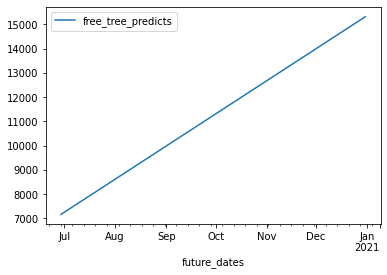

In [24]:
needed_predictions.plot(x='future_dates', y='free_tree_predicts')